<a href="https://colab.research.google.com/github/sauravakolia/License_Plate_Reader/blob/main/character_recogination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade --quiet

     |████████████████████████████████| 194kB 13.9MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 


In [ ]:
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy

In [ ]:
!wget --header 'Host: raw.githubusercontent.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --header 'Upgrade-Insecure-Requests: 1' 'https://raw.githubusercontent.com/minhthangdang/CharactersRecognition/master/English.tar.gz' --output-document 'English.tar.gz'

--2020-12-14 06:06:58--  https://raw.githubusercontent.com/minhthangdang/CharactersRecognition/master/English.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32855155 (31M) [application/octet-stream]
Saving to: ‘English.tar.gz’

English.tar.gz      100%[===================>]  31.33M   107MB/s    in 0.3s    

2020-12-14 06:07:00 (107 MB/s) - ‘English.tar.gz’ saved [32855155/32855155]



In [ ]:
!tar -xf  "/content/English.tar.gz"

In [ ]:
labels = [
    '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G',
    'H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'
    ]


In [ ]:
len(labels)

36

In [ ]:
# df=pd.read_csv(path/"train.csv")

# df['image_id']=df['image_id'].map(lambda x:f'train/{x}')
# df = df.sample(frac=1).reset_index(drop=True) 
# # df['breed']=df['breed'].map(lambda x: np.where(labels==x)[0][0])
# df

In [ ]:
path=Path("//content/English/Fnt")

In [ ]:
for x in os.listdir(path):
  name=int(x[-2:])
  if name<10:
    name=10-name
    name=10-name


In [ ]:
item_tfms = RandomResizedCrop(460,min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=28,do_flip=False,flip_vert=False ,max_warp=0), Normalize.from_stats(*imagenet_stats)]
bs=32

In [ ]:
# ?RandomResizedCrop()

In [ ]:
dls=ImageDataLoaders.from_folder(
                             path,
                             valid_pct=0.2,
                             suff='.png',
                             item_tfms=Resize(28),
                             item_stats=item_tfms,
                             batch_tfms=batch_tfms        
                             )


# dls=ImageDataLoaders.from_df(df,
#                              path,
#                              valid_pct=0.2,
#                              suff='.jpg',
#                              item_tfms=Resize(24),
#                              label_col=1,
#                              fn_col=0,
#                              item_stats=item_tfms,
#                              batch_tfms=batch_tfms
#                              )


In [ ]:
# ?ImageDataLoaders.from_folder()

In [ ]:
# test_dls=ImageDataLoaders.from_df(df,path,folder='test',suff='.jpg',item_tfms=Resize(128),)
dls.vocab

['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036']

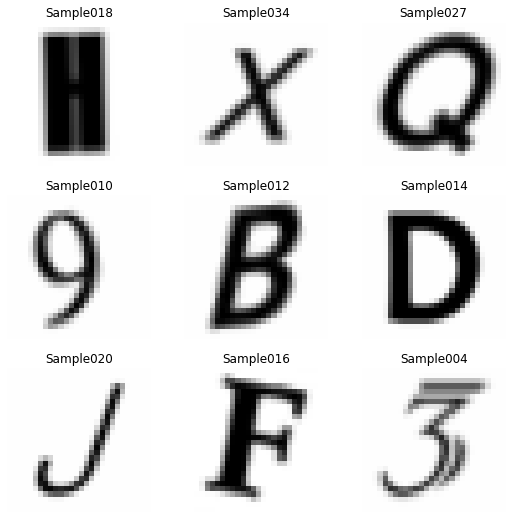

In [ ]:
dls.show_batch()

In [ ]:
learn=cnn_learner(dls,arch=resnet18,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.009120108559727669)

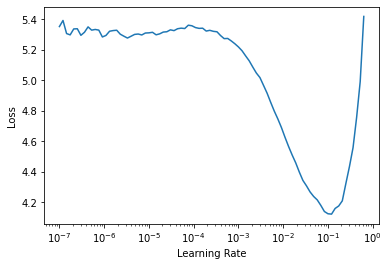

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(15,1e-02)                       

epoch,train_loss,valid_loss,accuracy,time
0,1.270798,0.770470,0.798223,00:51


epoch,train_loss,valid_loss,accuracy,time
0,0.364506,0.230416,0.935202,00:53
1,0.287592,0.178592,0.947095,00:53
2,0.290539,0.176575,0.952016,00:53
3,0.212893,0.168305,0.956118,00:54
4,0.184792,0.109276,0.967054,00:53
5,0.183329,0.108831,0.966234,00:54
6,0.149877,0.093470,0.970335,00:54
7,0.114410,0.078268,0.976077,00:54
8,0.087793,0.073581,0.975803,00:53
9,0.072606,0.055583,0.981408,00:54


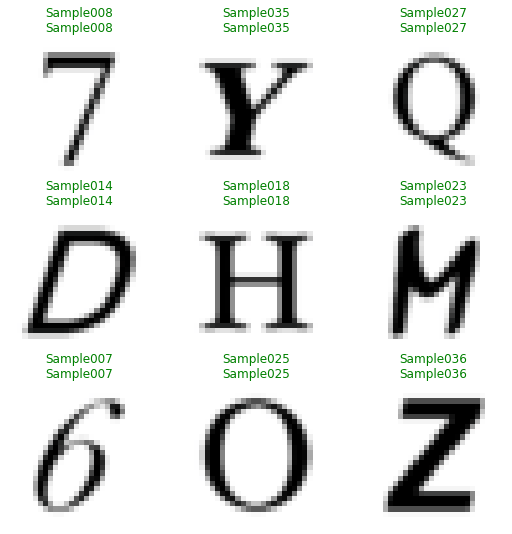

In [ ]:
learn.show_results()

In [ ]:
learn.unfreeze()

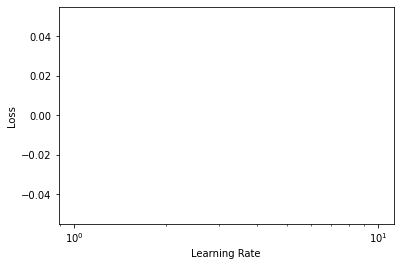

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4,1e-07)

epoch,train_loss,valid_loss,accuracy,time
0,0.032502,0.042255,0.984416,00:53


epoch,train_loss,valid_loss,accuracy,time
0,0.039425,0.043658,0.984689,00:53
1,0.037376,0.042596,0.984416,00:54
2,0.028840,0.042382,0.984416,00:54
3,0.033356,0.042455,0.984826,00:54


In [ ]:
learn.freeze()

In [ ]:
learn.save('28')

Path('//content/English/Fnt/models/28.pth')

In [ ]:
intrep=Interpretation.from_learner(learn)

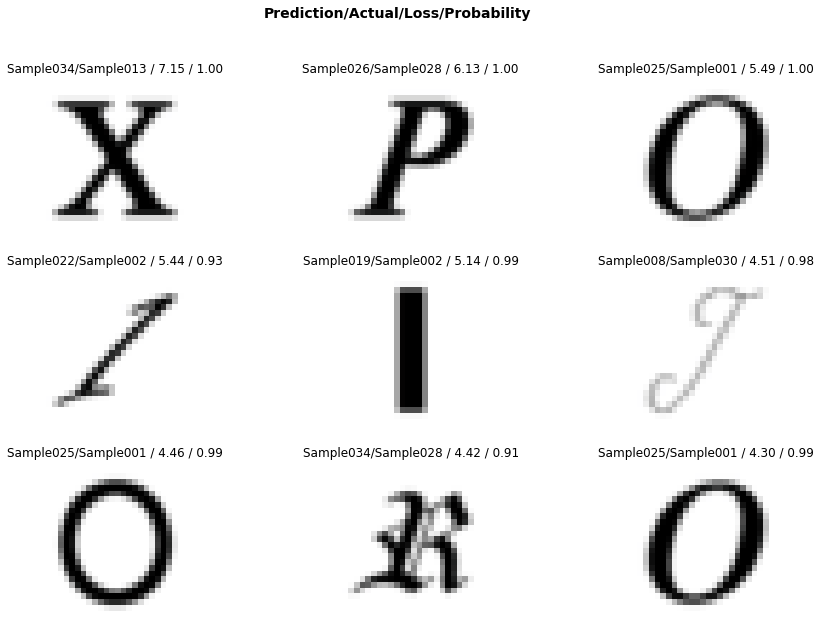

In [ ]:
intrep.plot_top_losses(9, figsize=(15,10))

In [ ]:
# test_df=pd.read_csv(path/"test.csv")

In [ ]:
# test_df['image_id']=test_df['image_id'].map(lambda x: f'test/{x}')
# # test_df=test_df.drop(columns=['image_id'])
# test_df

In [ ]:
item_tfms = RandomResizedCrop(460,min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=48,do_flip=False,flip_vert=False ,max_warp=0), Normalize.from_stats(*imagenet_stats)]
bs=32

In [ ]:
# ?RandomResizedCrop()

In [ ]:
dls=ImageDataLoaders.from_folder(
                             path,
                             valid_pct=0.2,
                             suff='.png',
                             item_tfms=Resize(48),
                             item_stats=item_tfms,
                             batch_tfms=batch_tfms        
                             )


# dls=ImageDataLoaders.from_df(df,
#                              path,
#                              valid_pct=0.2,
#                              suff='.jpg',
#                              item_tfms=Resize(24),
#                              label_col=1,
#                              fn_col=0,
#                              item_stats=item_tfms,
#                              batch_tfms=batch_tfms
#                              )


In [ ]:
# ?ImageDataLoaders.from_folder()

In [ ]:
# test_dls=ImageDataLoaders.from_df(df,path,folder='test',suff='.jpg',item_tfms=Resize(128),)
dls.vocab

['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036']

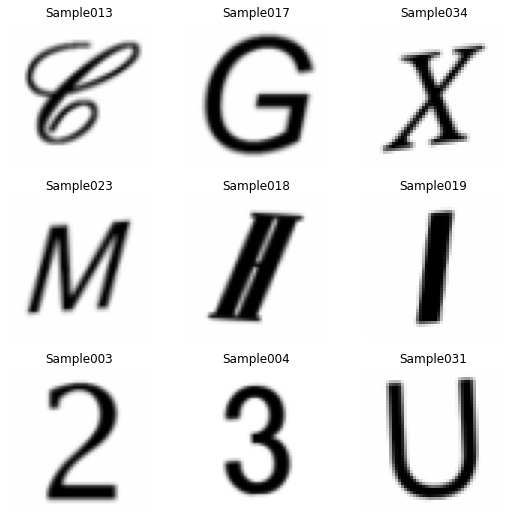

In [ ]:
dls.show_batch()

In [ ]:
learn.dls=dls

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.0063095735386013985)

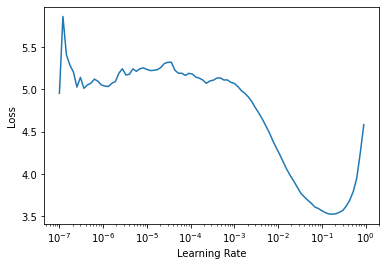

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(15,1e-02)                       

epoch,train_loss,valid_loss,accuracy,time
0,0.431805,0.273235,0.917430,00:55


epoch,train_loss,valid_loss,accuracy,time
0,0.138289,0.091846,0.969378,00:55
1,0.117896,0.097999,0.968694,00:55
2,0.125986,0.098429,0.969651,00:55
3,0.109352,0.089852,0.971565,00:55
4,0.095779,0.084157,0.972386,00:55
5,0.078807,0.079919,0.976897,00:55
6,0.068488,0.065387,0.977717,00:55
7,0.074801,0.063063,0.979494,00:55
8,0.047270,0.054098,0.980178,00:55
9,0.041427,0.045543,0.984142,00:55


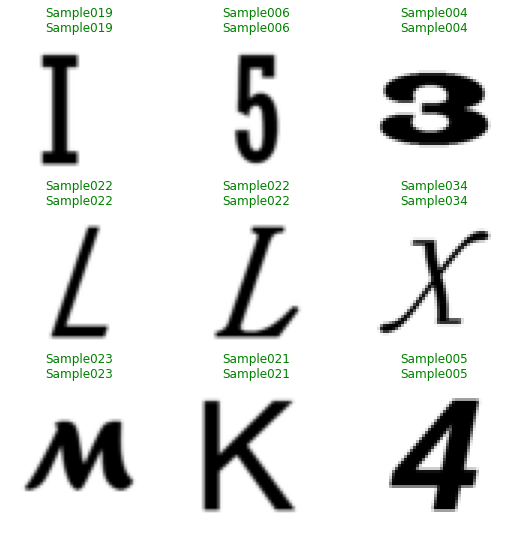

In [ ]:
learn.show_results()

In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=7.585775847473997e-07)

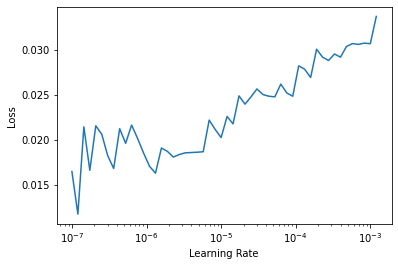

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4,1e-07)

epoch,train_loss,valid_loss,accuracy,time
0,0.028385,0.036022,0.984689,00:55


epoch,train_loss,valid_loss,accuracy,time
0,0.023793,0.036480,0.984689,00:55
1,0.023173,0.036023,0.984689,00:55
2,0.022069,0.035995,0.984962,00:55
3,0.025731,0.035919,0.984826,00:55


In [ ]:
learn.freeze()

In [ ]:
intrep=Interpretation.from_learner(learn)

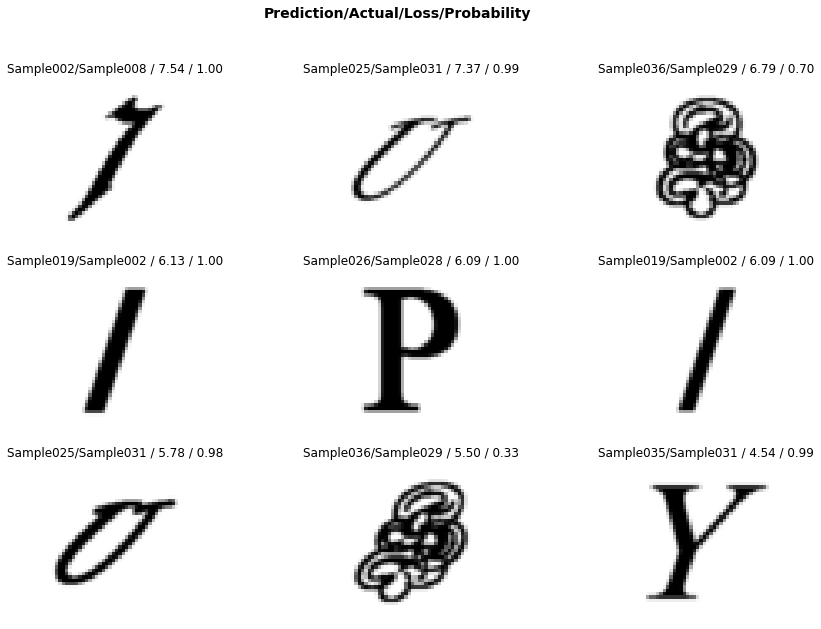

In [ ]:
intrep.plot_top_losses(9, figsize=(15,10))

In [ ]:
# test_df=pd.read_csv(path/"test.csv")

In [ ]:
# test_df['image_id']=test_df['image_id'].map(lambda x: f'test/{x}')
# # test_df=test_df.drop(columns=['image_id'])
# test_df

In [ ]:
learn.save('48')

Path('//content/English/Fnt/models/48.pth')

In [ ]:
item_tfms = RandomResizedCrop(460,min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=128,do_flip=False,flip_vert=False ,max_warp=0), Normalize.from_stats(*imagenet_stats)]
bs=32

In [ ]:
# ?RandomResizedCrop()

In [ ]:
dls=ImageDataLoaders.from_folder(
                             path,
                             valid_pct=0.2,
                             suff='.png',
                             item_tfms=Resize(128),
                             item_stats=item_tfms,
                             batch_tfms=batch_tfms        
                             )


# dls=ImageDataLoaders.from_df(df,
#                              path,
#                              valid_pct=0.2,
#                              suff='.jpg',
#                              item_tfms=Resize(24),
#                              label_col=1,
#                              fn_col=0,
#                              item_stats=item_tfms,
#                              batch_tfms=batch_tfms
#                              )


In [ ]:
# ?ImageDataLoaders.from_folder()

In [ ]:
# test_dls=ImageDataLoaders.from_df(df,path,folder='test',suff='.jpg',item_tfms=Resize(128),)
dls.vocab

['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036']

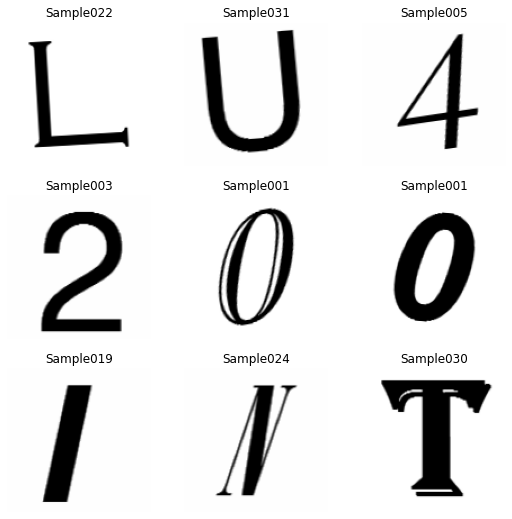

In [ ]:
dls.show_batch()

In [ ]:
learn.dls=dls

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.013182567432522774)

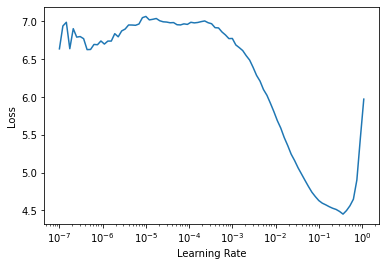

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(15,1e-02)                       

epoch,train_loss,valid_loss,accuracy,time
0,0.547977,0.347757,0.902529,00:53


epoch,train_loss,valid_loss,accuracy,time
0,0.137650,0.105225,0.967601,00:54
1,0.095672,0.066372,0.976487,00:54
2,0.094973,0.062793,0.977033,00:54
3,0.105265,0.059155,0.979494,00:54
4,0.080496,0.049729,0.981955,00:54
5,0.067177,0.053792,0.980725,00:54
6,0.065594,0.035561,0.984826,00:54
7,0.053236,0.036753,0.985646,00:54
8,0.044069,0.039407,0.983869,00:54
9,0.038756,0.039814,0.984142,00:54


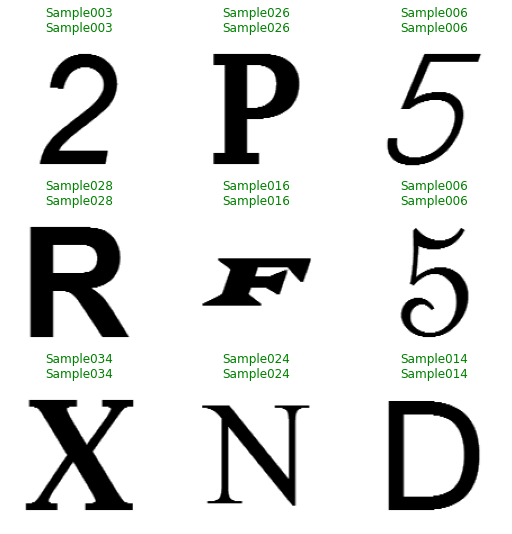

In [ ]:
learn.show_results()

In [ ]:
learn.unfreeze()

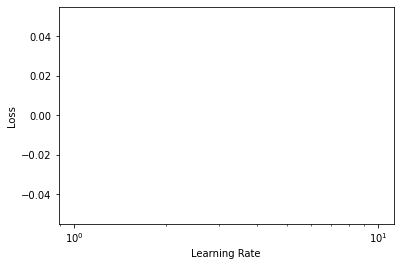

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4,1e-07)

epoch,train_loss,valid_loss,accuracy,time
0,0.023362,0.023835,0.990567,00:53


epoch,train_loss,valid_loss,accuracy,time
0,0.017740,0.024004,0.990021,00:54
1,0.021544,0.023814,0.990294,00:54
2,0.022310,0.023837,0.989884,00:54
3,0.021127,0.023911,0.990021,00:54


In [ ]:
learn.freeze()

In [ ]:
intrep=Interpretation.from_learner(learn)

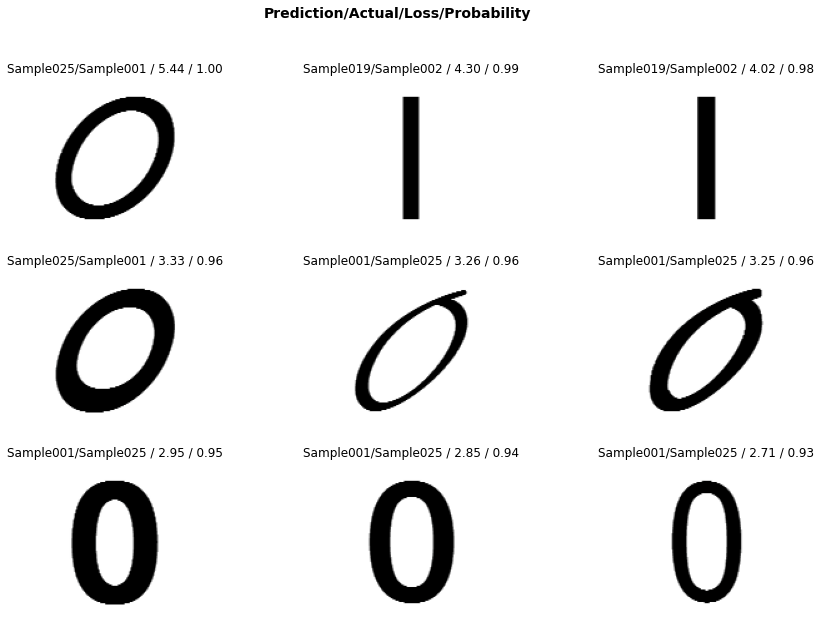

In [ ]:
intrep.plot_top_losses(9, figsize=(15,10))

In [ ]:
# test_dls=ImageDataLoaders.from_df(test_df,path,folder='test',suff='.jpg',item_tfms=Resize(128))
learn.export()